# Data Preparation





In [22]:
import pandas as pd
import numpy as np
import random
import os

In [23]:
age = []
fbs = []
bp = []
chol = []
chest_pain = [] 
height = []
weight =[]

In [24]:
for i in range(20000):
    chpain_t = np.random.randint(0,2)
    chol_t = np.random.randint(150,351)
    fbs_t = np.random.randint(50,201)
    height_t = np.random.randint(140,191)
    weight_t = np.random.randint(35,111)
    bp_t = np.random.randint(75,261)
    if i%5==0 or i%3==0:
        age_t = np.random.choice([np.random.randint(20,46),np.random.randint(71,86)])
    else:
        age_t = np.random.randint(45,71)
    age.append(age_t)
    height.append(height_t)
    weight.append(weight_t)
    chest_pain.append(chpain_t)
    bp.append(bp_t)
    fbs.append(fbs_t)
    chol.append(chol_t)

In [25]:
heart_dict = {'age':age, 'height':height, 'weight':weight, 'chest_pain':chest_pain, 'bp':bp, 'fbs':fbs, 'chol':chol}

In [26]:
df_heart = pd.DataFrame(heart_dict)

In [27]:
df_heart

,age,height,weight,chest_pain,bp,fbs,chol
0,38,160,103,1,114,71,159
1,51,184,110,0,255,113,315
2,64,190,50,0,229,138,173
3,82,152,65,1,235,102,165
4,48,176,47,0,225,168,194
5,42,161,95,0,209,64,175
6,75,188,102,1,258,123,218
7,51,144,92,1,95,156,232
8,70,172,97,1,183,150,267
9,29,150,60,0,176,173,158


In [28]:
df_heart.to_csv('heart_data.csv',index=False)

# Data Filtering

In [29]:
df = pd.read_csv('heart_data.csv')

In [30]:
df1 = pd.read_csv('heart_data.csv')

In [31]:
df.head(10)

,age,height,weight,chest_pain,bp,fbs,chol
0,38,160,103,1,114,71,159
1,51,184,110,0,255,113,315
2,64,190,50,0,229,138,173
3,82,152,65,1,235,102,165
4,48,176,47,0,225,168,194
5,42,161,95,0,209,64,175
6,75,188,102,1,258,123,218
7,51,144,92,1,95,156,232
8,70,172,97,1,183,150,267
9,29,150,60,0,176,173,158


In [32]:
risk = []
rule = []

In [33]:
for i in range(len(df)):
    bmi = round(((df.iloc[i,2])/((df.iloc[i,1]/100)**2)),2)
    temp = df.iloc[i,:].tolist()
    if((temp[5]>120 and temp[4]>145 and temp[0]>52) or (bmi>=24.5 and temp[6]>210) or (temp[3]==1 and temp[6]>200 and temp[0]>56)):
        risk.append(1)
#         rule.append(1)
    elif((temp[4]>150 and temp[6]>210) or (temp[3]==1 and temp[4]<150 and temp[6]>200) or (temp[5]>=120 and temp[0]>60 and temp[6]<200)):
        risk.append(1)
#         rule.append(2)
    elif((temp[3]==0 and (bmi in range(18,25)) and temp[6]<190 and temp[0]<30) or (temp[5]<120 and temp[6]<190 and temp[0]<40)):
        risk.append(0)
#         rule.append(3)
    else:
        risk.append(0)
#         rule.append(0)
         

In [34]:
df1.insert(7,'risk',risk)

In [35]:
df1

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,38,160,103,1,114,71,159,0
1,51,184,110,0,255,113,315,1
2,64,190,50,0,229,138,173,1
3,82,152,65,1,235,102,165,0
4,48,176,47,0,225,168,194,0
5,42,161,95,0,209,64,175,0
6,75,188,102,1,258,123,218,1
7,51,144,92,1,95,156,232,1
8,70,172,97,1,183,150,267,1
9,29,150,60,0,176,173,158,0


In [36]:
df_yes = df1[df1.risk == 1]
df_no = df1[df1.risk == 0]

In [37]:
df_new = df1.iloc[-1:-1,:]

In [38]:
df_new

,age,height,weight,chest_pain,bp,fbs,chol,risk


In [39]:
df_new = df_new.append(df_no,ignore_index=True)
df_new = df_new.iloc[:3824,:]
df_new = df_new.append(df_yes,ignore_index=True)

In [40]:
df_new

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,38,160,103,1,114,71,159,0
1,82,152,65,1,235,102,165,0
2,48,176,47,0,225,168,194,0
3,42,161,95,0,209,64,175,0
4,29,150,60,0,176,173,158,0
5,64,160,73,0,250,98,183,0
6,45,186,81,1,114,169,170,0
7,85,167,49,0,128,101,316,0
8,65,157,57,1,154,53,155,0
9,30,185,48,1,150,62,250,0


In [41]:
df_new = df_new.iloc[:10000,:]

In [42]:
from sklearn.utils import shuffle

df_new = shuffle(df_new).reset_index(drop=True)

In [43]:
df_new

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,30,188,71,0,153,195,238,1
1,74,144,109,0,245,64,206,0
2,63,155,93,1,113,163,340,1
3,74,187,49,0,118,144,205,0
4,40,177,100,0,249,84,189,0
5,66,164,46,1,168,113,279,1
6,64,147,62,1,82,177,322,1
7,53,190,83,1,156,87,264,1
8,48,176,42,0,85,115,317,0
9,31,150,86,1,133,170,267,1


In [44]:
df_new.risk.value_counts()

1    6176
0    3824
Name: risk, dtype: int64

In [ ]:
df_new.to_csv('heart_pred_data.csv',index=False)

# Data Representation

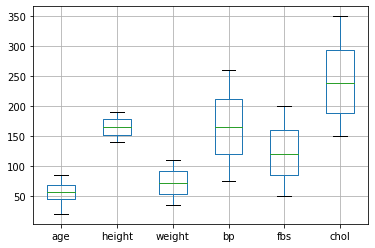

In [49]:
df = pd.read_csv('heart_pred_data.csv')
boxplot = df.boxplot(column=['age', 'height', 'weight','bp','fbs','chol'])

# Modelling KNN

In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
from matplotlib.colors import ListedColormap

# Reading the csv file

In [3]:
df = pd.read_csv('heart_pred_data.csv')
print(df.head(10))

   age  height  weight  chest_pain   bp  fbs  chol  risk
0   67     141      35           1  185   84   333     1
1   73     164      46           1  231  123   208     1
2   59     158      86           1   93   61   194     0
3   59     154      54           1   98  187   265     1
4   36     186     103           0  186  131   325     1
5   37     154      84           0  202  127   156     0
6   48     157      89           0  228  187   202     0
7   35     179      88           1  221  161   242     1
8   66     185      48           0   90   92   238     0
9   55     170      70           0  213  117   200     0


# Splittng data for prediction

In [4]:
#splittng data for prediction
df1 = df.iloc[9000:,:]
df = df.iloc[:9000,:]

In [5]:
test_XX = df1.iloc[:,:-1].values

In [6]:
actual_yy = df1.iloc[:,-1].values

In [7]:
actual_y = actual_yy.tolist()

In [21]:
df.head(10)

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,67,141,35,1,185,84,333,1
1,73,164,46,1,231,123,208,1
2,59,158,86,1,93,61,194,0
3,59,154,54,1,98,187,265,1
4,36,186,103,0,186,131,325,1
5,37,154,84,0,202,127,156,0
6,48,157,89,0,228,187,202,0
7,35,179,88,1,221,161,242,1
8,66,185,48,0,90,92,238,0
9,55,170,70,0,213,117,200,0


In [9]:
df.risk.value_counts()

1    5555
0    3445
Name: risk, dtype: int64

In [10]:
X = df.iloc[:,:7]
Y = df.iloc[:,-1]

In [11]:
db_no =df[df.risk == 0]
db_yes = df[df.risk == 1]
# df_minority_upsampled = resample(db_yes,replace=True)
# new_df = pd.concat([db_no, df_minority_upsampled])
#df_minority_upsampled.value_counts()
# new_df = shuffle(new_df)
X_features = list( df.columns )[:-1]

print("Features: ",X_features)

Features:  ['age', 'height', 'weight', 'chest_pain', 'bp', 'fbs', 'chol']


In [12]:
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size = 0.2,random_state = 65)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit( train_X, train_y)
pred_y3 = knn.predict(test_X)

# Comparison plot

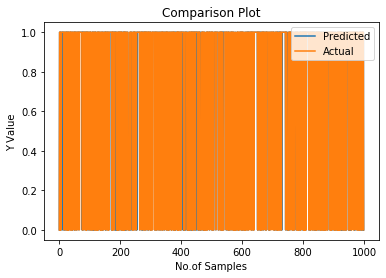

In [20]:
pred = knn.predict(test_XX)

def comaprison_plot(pred,actual):
    plt.plot(np.arange(1000),pred,label='Predicted')
    plt.plot(np.arange(1000),actual,label='Actual')
    plt.xlabel('No.of Samples')
    plt.ylabel('Y Value')
    plt.legend(loc='upper right')
    plt.title('Comparison Plot')
    plt.show()

comaprison_plot(pred,actual_yy)

In [14]:
r23=r2_score(test_y, pred_y3) 
mse3=mean_squared_error(test_y, pred_y3)
print("R Squared Error : ",r23)
print("Mean Squared Error : ",mse3)

R Squared Error :  0.5619982874527636
Mean Squared Error :  0.10277777777777777


# Heat map

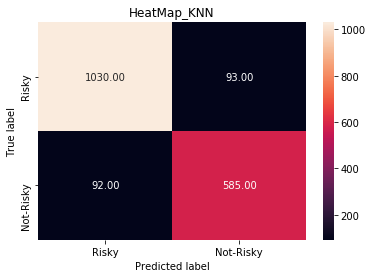

In [15]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_KNN')
    plt.show()
draw_cm(test_y,pred_y3 )

In [16]:
print( metrics.classification_report( test_y, pred_y3 ) )

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       677
           1       0.92      0.92      0.92      1123

    accuracy                           0.90      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.90      0.90      0.90      1800



# Accuracy

In [17]:
acc3 = metrics.accuracy_score(test_y, pred_y3)
print("Accuracy:",acc3)

prec3 = metrics.precision_score(test_y, pred_y3)
print("Precision:",prec3)

recall3 = metrics.recall_score(test_y, pred_y3)
print("Recall:",recall3)

f1sc3 = metrics.f1_score(test_y, pred_y3)
print("F1-Score:",f1sc3)

kappa3 = metrics.cohen_kappa_score(test_y, pred_y3)
print("Kappa-Stat:",kappa3)

Accuracy: 0.8972222222222223
Precision: 0.9180035650623886
Recall: 0.9171861086375779
F1-Score: 0.9175946547884186
Kappa-Stat: 0.7810633614466387


# ROC curve

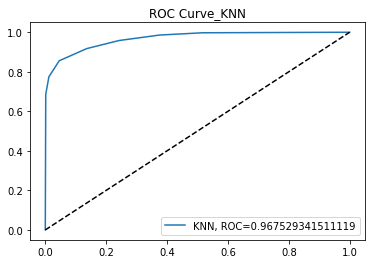

In [18]:
y_pred_proba3 = knn.predict_proba(test_X)[:,1]
fpr3, tpr3, _ = metrics.roc_curve( test_y,  y_pred_proba3)
auc3 = metrics.roc_auc_score( test_y, y_pred_proba3)
plt.plot(fpr3,tpr3,label="KNN, ROC="+str(auc3))
plt.legend(loc=4)
plt.title('ROC Curve_KNN')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

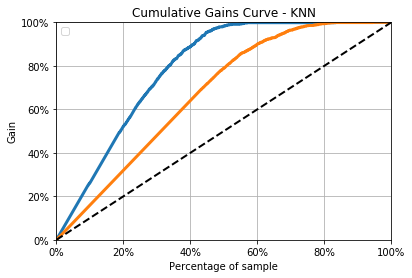

In [48]:
predicted_probas3 = knn.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas3)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"])
plt.legend('')
plt.title("Cumulative Gains Curve - KNN")
plt.show()

# data representation